# DATA ANALYSIS AND PREPROCESSING

## 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 2. Load the Datasets

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## 3. Data Inspection

We are going to perform several basic checks to get a high-level understanding of the data's structure, data types, and potential issues like missing values.

### 3.1 View the First Few Rows
We'll preview the first five rows of the training data.

In [3]:
print("Training Data Head:")
display(train_df.head())

Training Data Head:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


**Observation:** The output shows a mix of numerical features (like `DEWP`, `TEMP`), categorical features that have been one-hot encoded (like `cbwd_NW`), and the target variable, `pm2.5`. We can immediately see `NaN` (Not a Number) values in the `pm2.5` column for the first few entries.

### 3.2 Handle Datetime Column
A critical step we have to make in this time series analysis is to ensure the time column is in the correct `datetime` format and set as the index. This will enable powerful time-based slicing, plotting, and analysis.


In [4]:
# Convert the 'datetime' column in both dataframes
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Set datetime as the index
train_df.set_index('datetime', inplace=True)
test_df.set_index('datetime', inplace=True)

print("\nData types after setting datetime index:")
train_df.info()


Data types after setting datetime index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30676 entries, 2010-01-01 00:00:00 to 2013-07-02 03:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       30676 non-null  int64  
 1   DEWP     30676 non-null  float64
 2   TEMP     30676 non-null  float64
 3   PRES     30676 non-null  float64
 4   Iws      30676 non-null  float64
 5   Is       30676 non-null  float64
 6   Ir       30676 non-null  float64
 7   cbwd_NW  30676 non-null  float64
 8   cbwd_SE  30676 non-null  float64
 9   cbwd_cv  30676 non-null  float64
 10  pm2.5    28755 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.8 MB


**Observation:** This confirms the changes. The index is now a `DatetimeIndex`, and the `datetime` column has been removed from the list of columns. The data is now properly formatted as a time series.

### 3.3 Analyze the Target Variable (pm2.5)
The first and most important visualization is of the target variable, `pm2.5`, over time. This will help us identify overall trends, recurring seasonal patterns, and any unusual spikes or outliers.

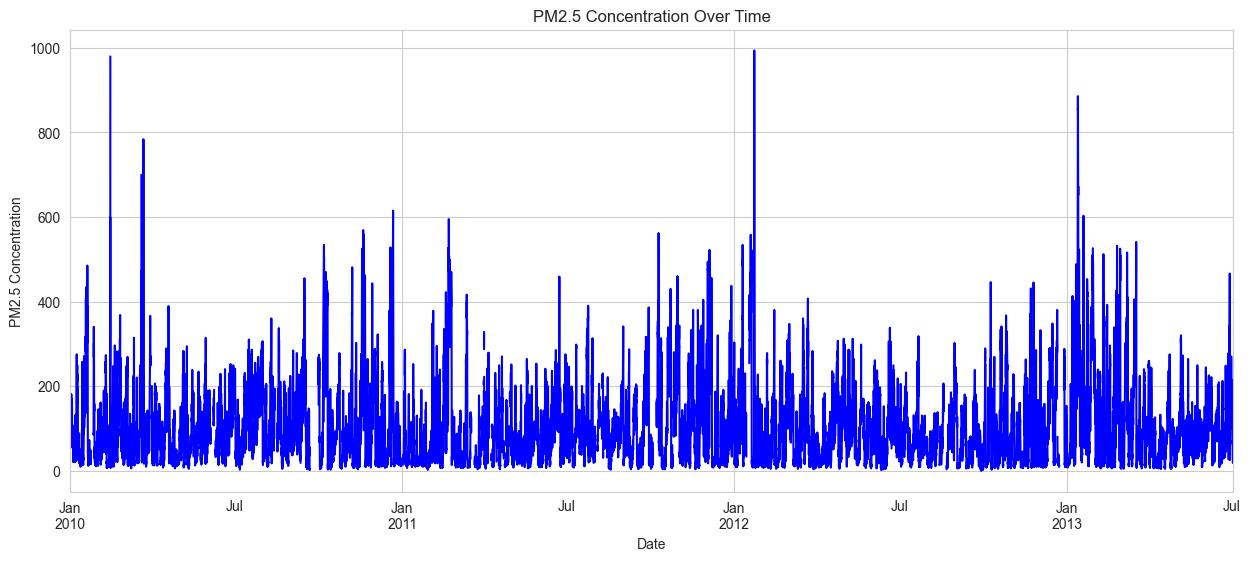

In [5]:
plt.figure(figsize=(15, 6))
train_df['pm2.5'].plot(title='PM2.5 Concentration Over Time', color='b')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.show()

**Observation:** 

- **Strong Seasonality:** There is a visible and repeating annual pattern. `PM2.5` concentrations consistently rise during the end of the year and are at their lowest during the middle of the year.

- **Outliers:** Numerous sharp, extreme spikes exist throughout the years, far exceeding the typical seasonal peaks. These represent severe pollution events.

- **No Obvious Trend:** There does not appear to be a significant long-term increase or decrease in the average pollution level.

### 3.4 Analyze Feature Distributions
Let's look at the distribution of each numerical feature using histograms. This helps us understand the shape, center, and spread of each variable's values.


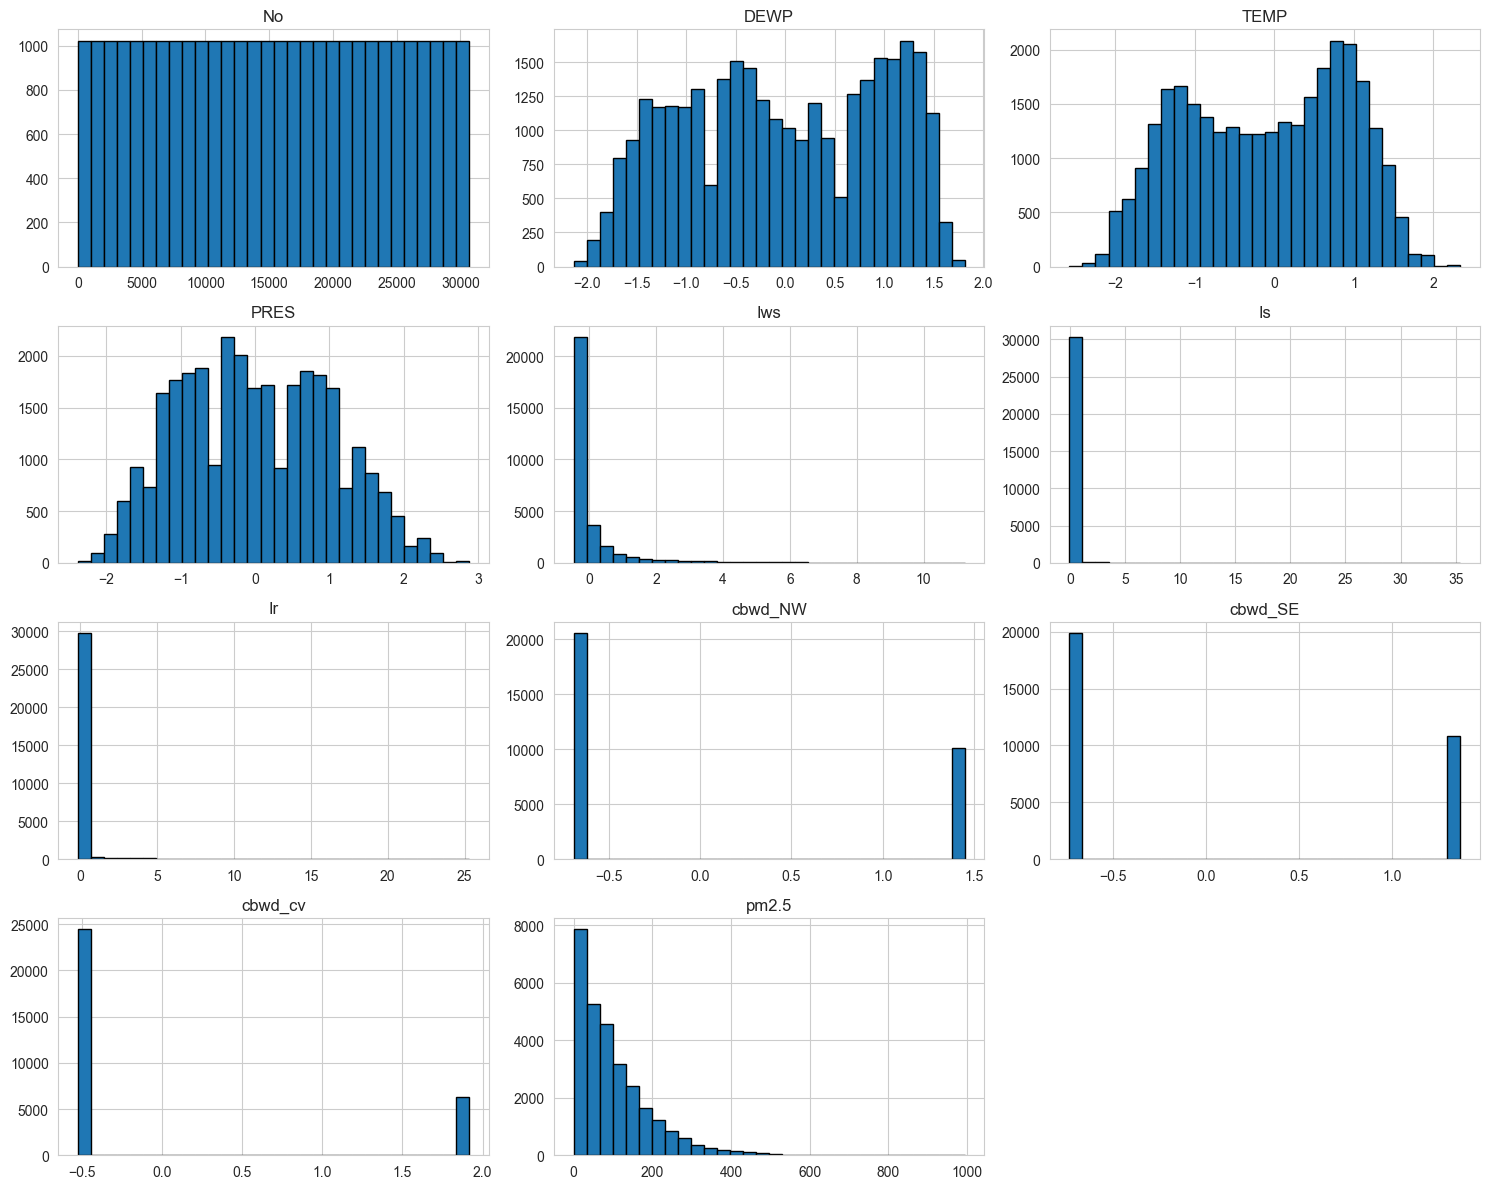

In [6]:
train_df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

**Observation:** The `pm2.5` histogram is heavily **right-skewed**, with most values concentrated on the lower end but a long tail of high values. Most other features like `DEWP`, `TEMP`, `PRES` have distributions that are roughly normal and centered around zero, which is characteristic of standardized data. The `Iws` feature is also **right-skewed**.

### 3.5 Analyze Missing Data Location
Before we decide how to fill the missing `pm2.5` values, it's useful to see where they are. We need to see if they are spread out randomly, or do they occur in large, continuous blocks.


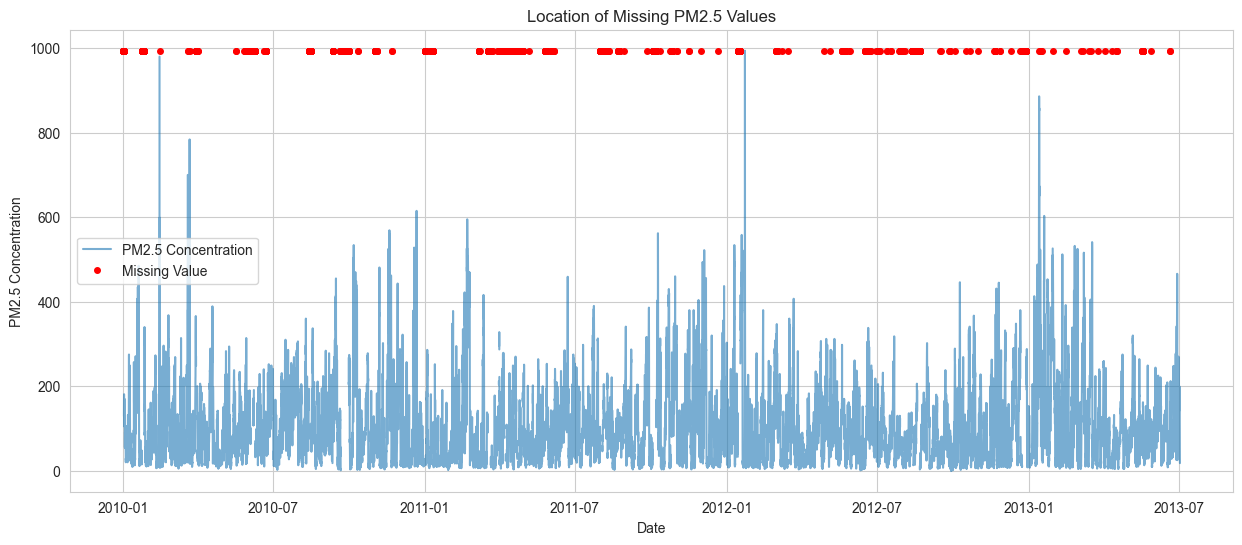

In [7]:
marker_height = train_df['pm2.5'].max()
missing_markers = np.where(train_df['pm2.5'].isnull(), marker_height, np.nan)

plt.figure(figsize=(15, 6))
plt.plot(train_df.index, train_df['pm2.5'], alpha=0.6, label='PM2.5 Concentration')
plt.plot(train_df.index, missing_markers, 'o', color='red', markersize=4, label='Missing Value')

plt.title('Location of Missing PM2.5 Values')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

### 3.6 Analyze Feature Correlations
Let's create a correlation heatmap. This visualization shows the linear relationship between each pair of variables. It's especially useful for seeing which features are most strongly correlated with our target, `pm2.5`.


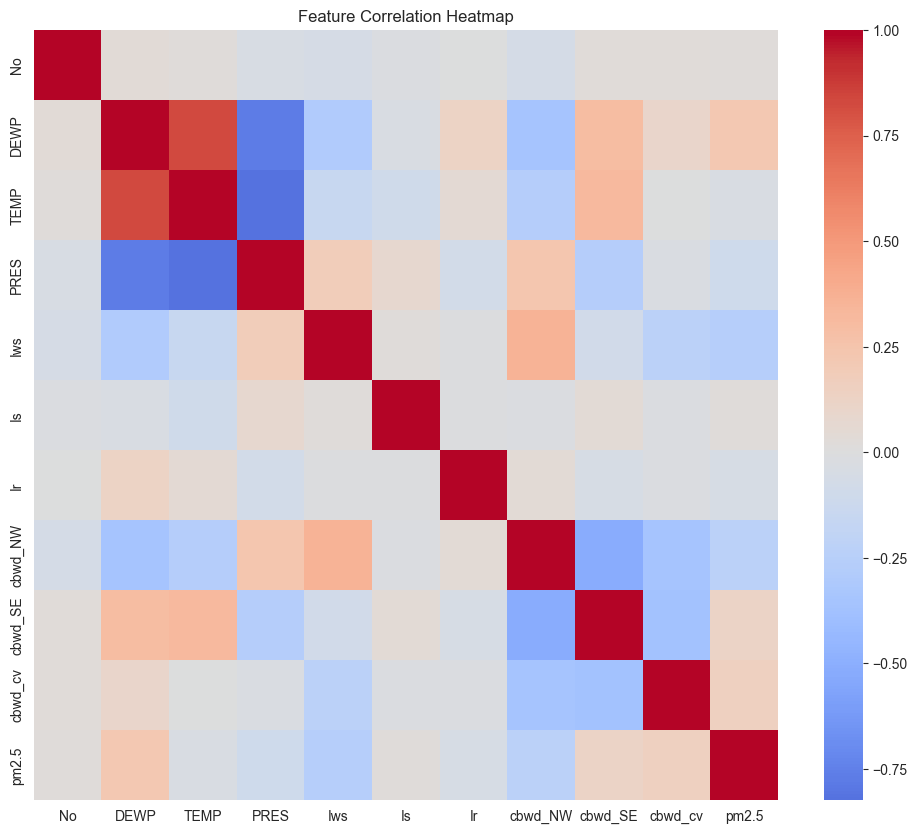

In [8]:
correlation_matrix = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

**Positive Correlation:** `DEWP` and `PRES` have a noticeable positive correlation with `pm2.5`.

**Negative Correlation**: `Iws` has a strong negative correlation. `TEMP` also has a slight negative correlation.